In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import operator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from nltk.probability import FreqDist
#os.chdir("drive/My Drive/winequality")
files = "winequality-red.csv"

In [205]:
def accuracy(pred,ref):
  acc = 0
  for a,b in zip(pred,ref):
    if a==b:
      acc +=1
    else:
      pass
  return (acc/len(pred))*100

content = []
with open(files) as f: 
  for line in f:
    line = re.sub("(\n)","",line)
    content.append(line.split(';'))


In [170]:
columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
red_wine_df = pd.DataFrame(content, columns = columns)
red_wine_df.drop([0], inplace = True)

red_wine_df.sample(frac= 1.0)
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [171]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


<AxesSubplot:xlabel='quality', ylabel='Count'>

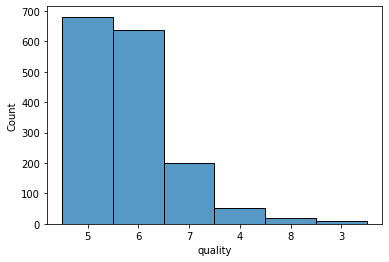

In [172]:
#plt.scatter(red_wine_df['quality'], red_wine_df['alcohol'])
sns.histplot(red_wine_df['quality'])

/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='density'>

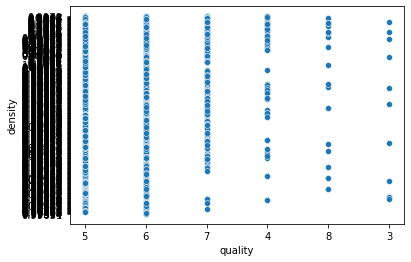

In [173]:
sns.scatterplot(red_wine_df['quality'],red_wine_df['density'])

In [174]:
red_wine_df = red_wine_df.sort_values(by = "quality")

/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

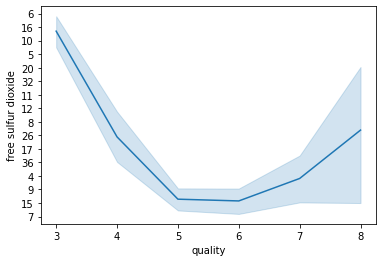

In [175]:
sns.lineplot(red_wine_df['quality'],red_wine_df['free sulfur dioxide'])
#sns.lineplot(red_wine_df['quality'],red_wine_df['free sulfur dioxide'])


Reducing the number of considered features. 

- pH can be representative of the alcohol present
- inverse relationship between pH and fixed acidity
- fixed acidity and citric acidity is similar
- inverse relationship between volatile acidity and citric acid.
- alcohol and density are inverse

*Remove alcohol
*decompose fixed acidity,volatile acidity and citric acid

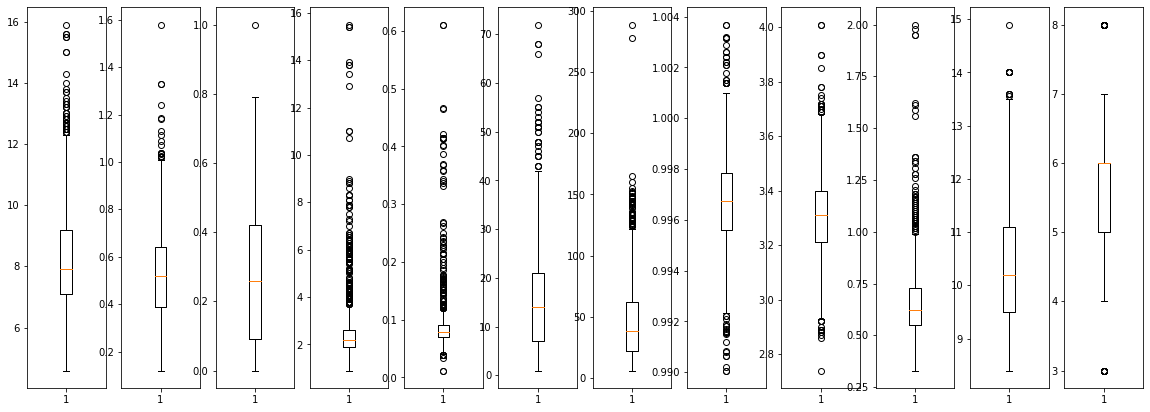

In [176]:
fig,ax = plt.subplots(1,len(columns), figsize = (20,7))

for i,item in enumerate(columns):
    ax[i].boxplot(red_wine_df[item].astype(float))
    #ax[i].xlabel(item)

In [177]:
SS = StandardScaler()
SS_red_wine_df = SS.fit_transform(red_wine_df)
SS_red_wine_df = pd.DataFrame(SS_red_wine_df, columns = columns)

SS_red_wine_df['quality'] = red_wine_df['quality']
SS_red_wine_df.dropna(inplace=True)


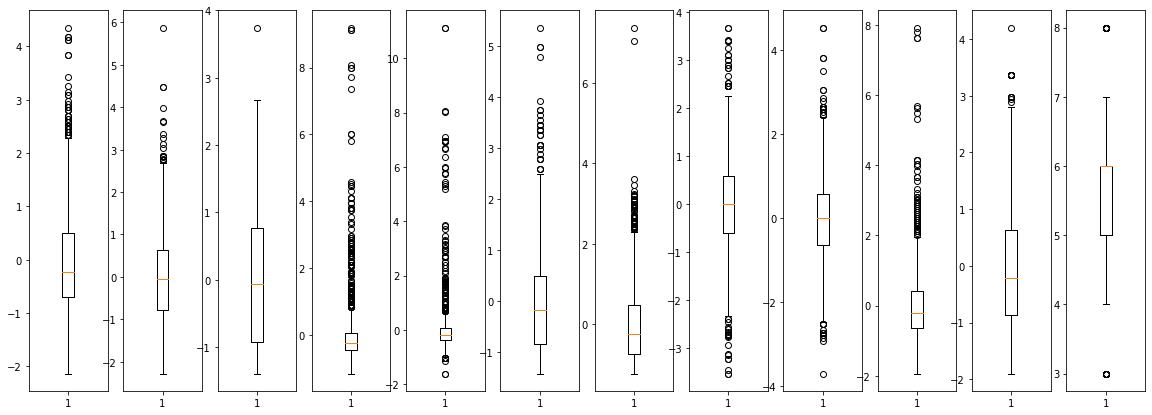

In [178]:
fig,ax_1 = plt.subplots(1,len(columns), figsize = (20,7))

for i,item in enumerate(columns):
    ax_1[i].boxplot(SS_red_wine_df[item].astype(float))
    #ax[i].xlabel(item)

This indicates that from the density alone of the wine does not determine the quality

<AxesSubplot:>

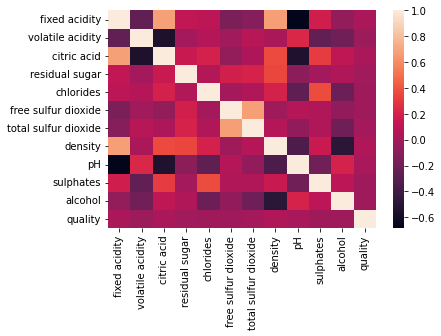

In [179]:
sns.heatmap(SS_red_wine_df.astype(float).corr())

Reducing the number of considered features. 

- pH can be representative of the alcohol present
- inverse relationship between pH and fixed acidity
- fixed acidity and citric acidity is similar
- inverse relationship between volatile acidity and citric acid.
- alcohol and density are inverse

*Remove alcohol
*decompose fixed acidity,volatile acidity and citric acid

In [180]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
new_columns = ['volatile acidity', 'residual sugar',"chlorides","free sulfur dioxide", "total sulfur dioxide", "pH", "sulphates", 'quality']

#decomposed citric acidity, density, fixed acidity
out_1 = pca.fit_transform(SS_red_wine_df, y = [new_columns])
a_red_wine_df = SS_red_wine_df[new_columns]
a_red_wine_df['out_1'] = out_1

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_4361/519556704.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_red_wine_df['out_1'] = out_1


In [181]:
y = a_red_wine_df['quality']
x = a_red_wine_df[['volatile acidity', 'residual sugar',"chlorides","free sulfur dioxide", "total sulfur dioxide", "pH", "sulphates"]]

In [197]:
new_red_wine_data = np.array(a_red_wine_df)
new_red_wine_data

array([[-0.49060723738133394, -0.7370095790417932, 1.222800127611018,
        ..., 1.191185784898649, '5', 1.616079796162706],
       [2.749549174170718, 0.6109984894009818, -0.0736769110325213, ...,
        -0.9922980604340692, '5', -1.50659297724777],
       [1.6043214769842165, -0.9498529582695998, 3.815754204898098, ...,
        -0.8742719066323005, '5', -1.4024918403414321],
       ...,
       [-1.4961730202767982, -0.45321840673805114, -0.09493063297749738,
        ..., -0.16611498382168924, '6', 1.5967339133936225],
       [-0.8257958316798221, -0.38227061366211557, -0.6687811254918511,
        ..., 0.6010550158898064, '6', -0.3720268454309914],
       [-0.9375253631126514, -0.5241661998139866, -0.2862141304822821,
        ..., 0.2469765544845004, '5', -0.5105817319643273]], dtype=object)

**Linear Model**

WITH STANDARDIZED COLUMNS

In [182]:
size = [0.5,0.4,0.3,0.2,0.1] #varying test and train_size
yvalues_test = {}; intercept = {}; predictions = {}; coeff = {}; xvalues_test = {}; rmse = {}
lr_model = LinearRegression()

for i in range(len(size)):
  current = size[i]
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = current)
  lr_model.fit(x_train,y_train)

  w = lr_model.coef_; b = lr_model.intercept_; coeff[current] = w; intercept[current] = b
  #predict output based on this model
  predictions[current] = lr_model.predict(x_test)
  xvalues_test[current] = x_test
  yvalues_test[current] = y_test


In [183]:
mse_lr = {}; mae_lr = {}; rmse_lr = {}; acc = {}

for i in range(len(size)):
  current = size[i]
  mse_lr[current] = metrics.mean_squared_error(lr_model.predict(xvalues_test[current]), yvalues_test[current])
  mae_lr[current] = metrics.mean_absolute_error(lr_model.predict(xvalues_test[current]), yvalues_test[current])
  rmse_lr[current] = np.sqrt(metrics.mean_absolute_error(lr_model.predict(xvalues_test[current]), yvalues_test[current]))
  acc[current] = metrics.accuracy_score(yvalues_test[current], np.round((lr_model.predict(xvalues_test[current])), 0))

In [184]:
mse_lr, acc

({0.5: 0.6714665466488662,
  0.4: 0.6518326922385844,
  0.3: 0.6696967127130544,
  0.2: 0.6811548228782172,
  0.1: 0.8009620975605147},
 {0.5: 0.0, 0.4: 0.0, 0.3: 0.0, 0.2: 0.0, 0.1: 0.0})

XGBOOST WITH CROSS VALIDATION

SPLIT,SHUFFLE

In [200]:
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [211]:
from sklearn.model_selection import RepeatedKFold, KFold

train_wine, test_wine = train_test_split(new_red_wine_data, random_state= 32, test_size= 0.2)

y_train_wine = train_wine[:,-1:]
x_train_wine = train_wine[:, :-1]

y_test_wine = test_wine[:,-1:]
x_test_wine = test_wine[:, :-1]

In [201]:
xg_model = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

#xgb_grid = GridSearchCV(xg_model, parameters, n_jobs = 10)
#xgb_grid.fit(x_train_wine,y_train_wine)
#best_xg_model = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.03, max_depth = 7, min_child_weight = 4, n_estimators = 500, nthread = 4, subsample = 0.7)

In [206]:
#cross validation
def cross_val_w_gridsearch(x, y, model, cv_method,params, num_of_splits = 8, method = "grid"):

    """Already defined splits, x-labels are ndarrays and
    Model is already initialised y - labels are also ndarrays"""
    
    output = []
    try:
        kf = cv_method(num_of_splits, shuffle = True, random_state = 10 )
        splits = kf.split(y)
    except ModuleNotFoundError:
        print("Import {} module".format(cv_method))
    
    if method.lower() == "grid" or "random":
        print(method)
        gridsearch = GridSearchCV(model, params, n_jobs = 10) 

        for train,val in splits:    

            gridsearch.fit(x[train],y[train])
            best_xgb_model = model.set_params(**gridsearch.best_params_)

            best_xgb_model.fit(x[train], y[train])
            pred = best_xgb_model.predict(x[val])

            pred = np.round(pred, 0) #rounded up in order to match labels
            ref =  y[val]

            #using accuracy as a metric to evaluate models
            acc = accuracy_score(pred,ref)
            output.append((acc,best_xgb_model,))
    else:
        print("select either 'grid' or 'random'")
    return output

K-FOLD CROSS VALIDATION WITH 8 FOLDS

In [213]:
#cross check input
pred = cross_val_w_gridsearch(x_train_wine, y_train_wine, xg_model, KFold, parameters, method = "grid")
pred

grid


[(0.0,
  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=4,
               missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=4,
               nthread=4, num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, ...)),
 (0.0,
  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depth

In [208]:

pred = sorted(pred, key = operator.itemgetter(0), reverse=False)

high_acc_model = pred[-1][1]


In [210]:
high_acc_model.fit(x_train_wine,y_train_wine)

predictions = high_acc_model.predict(x_test_wine)
predictions = np.round(predictions,0)

accuracy_score(predictions, y_test_wine)

0.0

KFOLD CROSS VALIDATION WITH 10 FOLDS

In [89]:
pred_2 = cross_val_w_gridsearch(x_train_wine, y_train_wine,xg_model,KFold, parameters, method = "grid")
pred_2[-1]

grid


(0.7295597484276729,
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=4,
              missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=4,
              nthread=4, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...))

In [90]:
high_acc_model_2 = pred_2[-1][1]

predictions = high_acc_model_2.predict(x_test_wine)
predictions = np.round(predictions, 0)

accuracy_score(predictions,y_test_wine)

0.664576802507837

RANDOMFOREST

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
param = {'n_estimators': [500],
        'max_depth': [3,5,7,9],
        'min_samples_split': [2,3,4],
        'min_samples_leaf': [1,3,5,7],
        'n_jobs': [300] 
        }

In [108]:
#cross check input
rf_model = RandomForestRegressor()

pred_3 = cross_val_w_gridsearch(x_train_wine, y_train_wine, rf_model, KFold, param, method = "grid")
pred_3 = sorted(pred_3, key = operator.itemgetter(0), reverse = False)

pred_3

grid


/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/max/Desktop/Wine_equality_/temp_env/lib

[(0.5625,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.6375,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.6375,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.65,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.65625,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.660377358490566,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_estimators=500, n_jobs=300)),
 (0.6792452830188679,
  RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                        n_

In [111]:
high_acc_model_3 = pred_3[-1][1]

high_acc_model_3.fit(x_train_wine, y_train_wine)
predictions_3 = high_acc_model_3.predict(x_test_wine)
predictions_3 = np.round(predictions_3, 0)

accuracy_score(predictions_3, y_test_wine)

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_44914/1663624654.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  high_acc_model_3.fit(x_train_wine, y_train_wine)


0.6363636363636364